# 데이터 스케일링 

: 각 데이터들의 특성을 일정한 값으로 변환하는 전처리 기법

-> 필요한 라이브러리 import 

-> 데이터 준비

-> 표준화 

-> 스케일링 된 결과를 DataFrame 즉, 2차원 데이터로 변환

In [8]:
# import 
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
url = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python-machine-learning-20210326/bike-demand.csv'
bike_data = pd.read_csv(url)

In [5]:
bike_data.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [6]:
data = bike_data.iloc[:,5:9]

In [7]:
data.head(3)

,temp,atemp,humidity,windspeed
0,9.84,14.395,81,0.0
1,9.02,13.635,80,0.0
2,9.02,13.635,80,0.0


In [10]:
print("average",np.round_(data.mean(),3))
print()
print("var",np.round_(data.var(),3))

average temp         20.231
atemp        23.655
humidity     61.886
windspeed    12.799
dtype: float64

var temp          60.709
atemp         71.819
humidity     370.371
windspeed     66.660
dtype: float64


In [11]:
# StandardScaler
standard = StandardScaler()

In [12]:
standard.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
result=standard.transform(data)

In [15]:
# Dataframe 에 저장
bike_Data = pd.DataFrame(data=result,columns=data.columns)

In [21]:
print('----StandardScaler----')
print("after mean",np.round_(bike_Data.mean(),3))
print()
print("after var",np.round_(bike_Data.var(),3))
# 실행 결과 -> 평균 0, 분산 1 이 되도록 전처리 완료

----StandardScaler----
after mean temp         0.0
atemp       -0.0
humidity    -0.0
windspeed   -0.0
dtype: float64

after var temp         1.0
atemp        1.0
humidity     1.0
windspeed    1.0
dtype: float64


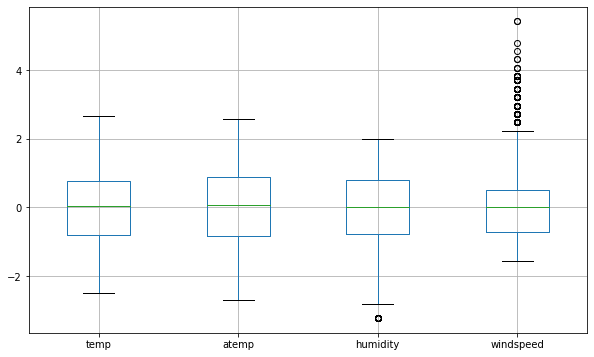

In [22]:
# 시각화
plt.figure(figsize=(10,6))
bike_Data.boxplot(column=['temp','atemp','humidity','windspeed'])
plt.show()